In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

london_monthly = pd.read_csv('housing_in_london_monthly_variables.csv')

london_monthly.head(10)

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1
5,1995-06-01,city of london,94901,E09000001,17.0,NaN,1
6,1995-07-01,city of london,110128,E09000001,13.0,NaN,1
7,1995-08-01,city of london,112329,E09000001,14.0,NaN,1
8,1995-09-01,city of london,104473,E09000001,17.0,NaN,1
9,1995-10-01,city of london,108038,E09000001,14.0,NaN,1


In [2]:
london_monthly.shape

(13549, 7)

In [3]:
london_monthly.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag'],
      dtype='object')

In [4]:
london_monthly.drop_duplicates()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [5]:
null_values = london_monthly.isnull().sum()
print(null_values)

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64


In [6]:
# A significant number of "no_of_crimes" records are null.
# It will be dropped along with "date" and "code" which do not seem helpful to regression analysis, and "borough_flag" which is redundant to "Area"

dropped_columns = ["date", "code", "no_of_crimes", "borough_flag"]
london_monthly.drop(columns = dropped_columns, inplace = True)

london_monthly.head, london_monthly.shape

(<bound method NDFrame.head of                  area  average_price  houses_sold
 0      city of london          91449         17.0
 1      city of london          82203          7.0
 2      city of london          79121         14.0
 3      city of london          77101          7.0
 4      city of london          84409         10.0
 ...               ...            ...          ...
 13544         england         249942      64605.0
 13545         england         249376      68677.0
 13546         england         248515      67814.0
 13547         england         250410          NaN
 13548         england         247355          NaN
 
 [13549 rows x 3 columns]>,
 (13549, 3))

In [7]:
# A limited number of records for houses_sold have null values. Those records will be eliminated from consideration.

cleaned_london_monthly = london_monthly.dropna(axis = 'rows')

cleaned_london_monthly.shape

(13455, 3)

In [8]:
# Null values have been addressed, but "Area" needs to be converted into Dummy Variables for analysis.

cleaned_london_monthly_with_dummies = pd.get_dummies(cleaned_london_monthly, columns = ["area"])

cleaned_london_monthly_with_dummies.head, cleaned_london_monthly_with_dummies.shape

(<bound method NDFrame.head of        average_price  houses_sold  area_barking and dagenham  area_barnet  \
 0              91449         17.0                      False        False   
 1              82203          7.0                      False        False   
 2              79121         14.0                      False        False   
 3              77101          7.0                      False        False   
 4              84409         10.0                      False        False   
 ...              ...          ...                        ...          ...   
 13542         248562      70681.0                      False        False   
 13543         249432      75079.0                      False        False   
 13544         249942      64605.0                      False        False   
 13545         249376      68677.0                      False        False   
 13546         248515      67814.0                      False        False   
 
        area_bexley  area_brent 

In [9]:
# Dummy variables should be converted from Boolean values to 1's for True or 0's for False

cleaned_london_monthly_with_numeric_dummies = cleaned_london_monthly_with_dummies.astype(int)

cleaned_london_monthly_with_numeric_dummies.head, cleaned_london_monthly_with_numeric_dummies.shape

(<bound method NDFrame.head of        average_price  houses_sold  area_barking and dagenham  area_barnet  \
 0              91449           17                          0            0   
 1              82203            7                          0            0   
 2              79121           14                          0            0   
 3              77101            7                          0            0   
 4              84409           10                          0            0   
 ...              ...          ...                        ...          ...   
 13542         248562        70681                          0            0   
 13543         249432        75079                          0            0   
 13544         249942        64605                          0            0   
 13545         249376        68677                          0            0   
 13546         248515        67814                          0            0   
 
        area_bexley  area_brent 

In [10]:
# When working with dummy variables it is customary to eliminate one dummy variable.

final_london_monthly = cleaned_london_monthly_with_numeric_dummies.iloc[:,:-1]

final_london_monthly.head, final_london_monthly.shape

(<bound method NDFrame.head of        average_price  houses_sold  area_barking and dagenham  area_barnet  \
 0              91449           17                          0            0   
 1              82203            7                          0            0   
 2              79121           14                          0            0   
 3              77101            7                          0            0   
 4              84409           10                          0            0   
 ...              ...          ...                        ...          ...   
 13542         248562        70681                          0            0   
 13543         249432        75079                          0            0   
 13544         249942        64605                          0            0   
 13545         249376        68677                          0            0   
 13546         248515        67814                          0            0   
 
        area_bexley  area_brent 

<Axes: xlabel='average_price', ylabel='Count'>

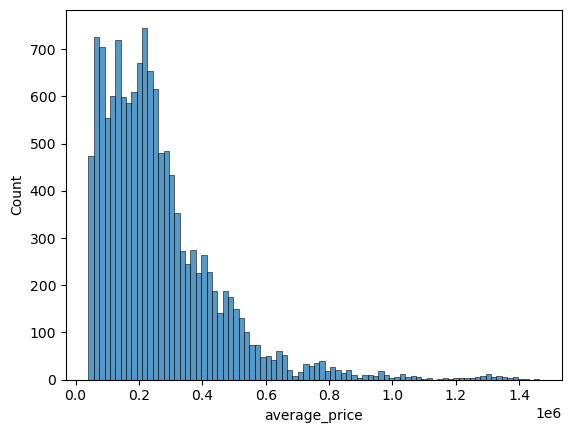

In [11]:
sns.histplot(data = final_london_monthly, x = "average_price")

<Axes: >

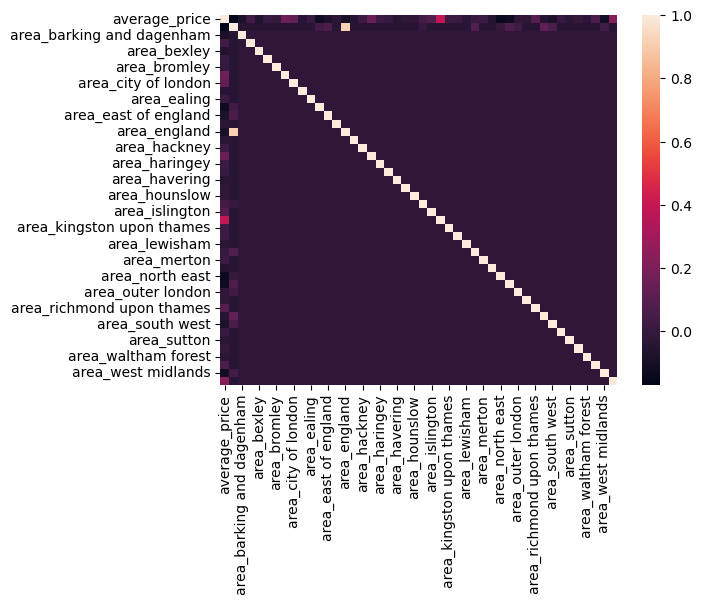

In [12]:
# heatmap
sns.heatmap(final_london_monthly.corr())

In [13]:
# Overall, correlation values are quite low. The most correlation appears to exist between "area_barking and dagenham" and "area_england"

In [14]:
X = final_london_monthly.iloc[:, 1:]
y = final_london_monthly['average_price']
print(X.shape)
print(y.shape)

(13455, 45)
(13455,)


In [15]:
# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape[0], X_test.shape[0]

(9418, 4037)

In [16]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.coef_, LR.intercept_

(array([-2.29360057e+00,  3.02635433e+04,  1.76563326e+05,  6.15648501e+04,
         1.37750104e+05,  1.26646072e+05,  3.29659861e+05,  3.10763076e+05,
         8.00975957e+04,  1.46000195e+05,  9.89649751e+03,  6.61286811e+04,
         9.09218109e+04,  2.00506436e+05,  9.90268013e+04,  1.56591827e+05,
         3.09993907e+05,  1.65987976e+05,  1.40648814e+05,  7.47637522e+04,
         1.05359896e+05,  1.02640169e+05,  2.01776955e+05,  2.43237189e+05,
         6.27398812e+05,  1.62085659e+05,  1.56388887e+05,  8.43108009e+04,
         1.61408610e+05,  1.69162509e+05,  7.17472079e+04, -2.10249517e+04,
         3.78836441e+03,  1.26380301e+05,  1.07073378e+05,  2.52669416e+05,
         1.01454345e+05,  5.85190622e+04,  1.48234496e+05,  9.53633462e+04,
         1.27681029e+05,  9.44187036e+04,  2.11303001e+05,  1.73609640e+04,
         4.37253950e+05]),
 127058.16205222107)

In [17]:
LR.score(X_train, y_train), LR.score(X_test, y_test)

(0.40989950664658437, 0.3805054337758732)

In [18]:
import os
n_cpu = os.cpu_count()
n_cpu

12

In [19]:
# Polynomial Regression with Gridsearch

# Already tried limiting the range from 5 to 3 degrees considered, this model may just be a wash.  Too many features.

# Stalling on a 3 degree polynomial as well, I'll give it some time but it's probably a no go unless Area is removed.

# Eventually worked but not worth it for the amount of time it took.

#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import make_pipeline
#from sklearn.model_selection import GridSearchCV

#param_poly = {'polynomialfeatures__degree' :  range(1,4)  }
#grid_poly = PolynomialFeatures()
#grid_lr = LinearRegression()
#grid_pipe_poly = make_pipeline(grid_poly, grid_lr)

#gridsearch_poly = GridSearchCV(grid_pipe_poly, param_poly, cv=5, n_jobs = 8)
#gridsearch_poly.fit(X_train, y_train)

#poly = PolynomialFeatures(degree = 3)

#X_train_poly = poly.fit_transform(X_train)

#polylr = LinearRegression()

#polylr.fit(X_train_poly, y_train)

In [20]:
# gridsearch_poly.best_params_, gridsearch_poly.best_score_, gridsearch_poly.best_estimator_

#X_test_poly = poly.fit_transform(X_test)

#y_pred_test = polylr.predict(X_test_poly)



#polylr.score(X_train_poly, y_train), polylr.score(X_test_poly, y_test)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_ridge={'alpha' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}

grid_ridge = Ridge()
grid_ridge_est = GridSearchCV(grid_ridge, param_ridge, cv=5, n_jobs = 8)
grid_ridge_est.fit(X_train, y_train)

# 3.1 Present performance measure
print(grid_ridge_est.best_score_)

# 3.2 find best hyperparameters
print(grid_ridge_est.best_params_)

# 3.3 find best parameter estimates
print(grid_ridge_est.cv_results_)

grid_ridge_est.score(X_test, y_test), grid_ridge_est.score(X_train, y_train)

0.4034508397352021
{'alpha': 0.01}
{'mean_fit_time': array([0.02194104, 0.01779842, 0.01365676, 0.01276541, 0.01575756,
       0.01715498, 0.01795144, 0.01635804, 0.01555796, 0.01676245,
       0.01695971, 0.01316395]), 'std_fit_time': array([0.00109249, 0.00385102, 0.00100723, 0.00146643, 0.00116226,
       0.00132327, 0.00154597, 0.00079756, 0.00149375, 0.00097741,
       0.00140913, 0.00318032]), 'mean_score_time': array([0.00339141, 0.00299335, 0.00259299, 0.00339146, 0.00379066,
       0.00398941, 0.00378947, 0.00338998, 0.0033906 , 0.00319028,
       0.00299149, 0.00199375]), 'std_score_time': array([4.88791967e-04, 6.30300628e-04, 1.01719675e-03, 4.87977088e-04,
       9.77924557e-04, 1.78670826e-06, 7.46366221e-04, 7.97081379e-04,
       1.01523206e-03, 3.92091977e-04, 6.30977540e-04, 6.30073603e-04]), 'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                   10000, 100000, 1000000],
             mask=[False, False, False, False, Fa

(0.3805082901446214, 0.4098994403528362)

In [23]:
from sklearn.linear_model import Lasso

param_lasso={'alpha' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# 2. Define function and fit the data
grid_lasso = Lasso()
grid_lasso_est = GridSearchCV(grid_lasso, param_lasso, cv=5)
grid_lasso_est.fit(X_train, y_train) 

# 3.1 Present performance measure
print(grid_lasso_est.best_score_)

# 3.2 find best hyperparameters
print(grid_lasso_est.best_params_)

# 3.3 find best parameter estimates
print(grid_lasso_est.cv_results_)
print(grid_lasso_est.cv_results_)

grid_lasso_est.score(X_test, y_test), grid_lasso_est.score(X_train, y_train)

0.4034506593308076
{'alpha': 1e-05}
{'mean_fit_time': array([0.13165884, 0.11902957, 0.10910997, 0.09916329, 0.09039745,
       0.07424641, 0.06471243]), 'std_fit_time': array([0.00756213, 0.00691602, 0.00840482, 0.0020153 , 0.00666945,
       0.00517291, 0.00379109]), 'mean_score_time': array([0.00219445, 0.00279298, 0.00219421, 0.00190258, 0.00219398,
       0.00219407, 0.00239339]), 'std_score_time': array([0.00039945, 0.00039907, 0.00074628, 0.00065756, 0.00039933,
       0.00039928, 0.0004886 ]), 'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 1e-05}, {'alpha': 0.0001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}, {'alpha': 10}], 'split0_test_score': array([0.39851422, 0.39851422, 0.39851421, 0.39851412, 0.39851327,
       0.39850294, 0.39827075]), 'split1_test_score': array([0.41009303, 0.4100930

(0.3805054337722489, 0.40989950664658403)

In [24]:
# Regression Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

opt_tree = DecisionTreeRegressor(random_state = 0)

dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }


#grid_tree = GridSearchCV(opt_tree, dt_params)
#grid_tree.fit(X_train, y_train)

# This code takes longer because of its complexity
# To make it faster, can try this line of code instead to multithread
    # Added n_jobs = 4

grid_tree = GridSearchCV(opt_tree, dt_params, n_jobs = 8)
grid_tree.fit(X_train, y_train)



GridSearchCV(estimator=DecisionTreeRegressor(random_state=0), n_jobs=8,
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [25]:
# 3.1 Present performance measure
print(grid_tree.best_score_)

# 3.2 find best hyperparameters
print(grid_tree.best_params_)

# 3.3 find best parameter estimates
print(grid_tree.cv_results_)

0.4282369105573204
{'max_depth': 7, 'max_leaf_nodes': 10, 'min_samples_split': 2}
{'mean_fit_time': array([0.01037288, 0.00837717, 0.00759025, 0.00937467, 0.00877671,
       0.00837746, 0.00917497, 0.00877662, 0.00841479, 0.00877657,
       0.00977416, 0.0080802 , 0.00907764, 0.0093739 , 0.00918198,
       0.00737772, 0.00877829, 0.0091742 , 0.00957503, 0.00957427,
       0.00917549, 0.00937409, 0.0099731 , 0.00937614, 0.00877843,
       0.0087759 , 0.0077805 , 0.00817952, 0.00877705, 0.00897684,
       0.00818067, 0.00797849, 0.00897698, 0.00857754, 0.008777  ,
       0.00698142, 0.00897598, 0.00997319, 0.00897703, 0.00817838,
       0.0083787 , 0.00937567, 0.00837798, 0.00857635, 0.00817747,
       0.00837755, 0.00957456, 0.00897608, 0.00937386, 0.00877118,
       0.00897651, 0.00897722, 0.00897508, 0.00957608, 0.00982594,
       0.00918083, 0.00917492, 0.00939445, 0.00897651, 0.00977292,
       0.0093936 , 0.00957522, 0.00937471, 0.01032877, 0.00957432,
       0.00937371, 0.00982685

In [26]:
grid_tree.score(X_test, y_test), grid_tree.score(X_train, y_train)

(0.43709319805696845, 0.44700869811794075)

In [27]:
# Regression Random Forest
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators=500, max_samples=1000, random_state=42)
rnd_reg.fit(X_train, y_train)
print(rnd_reg.score(X_test, y_test))
print(rnd_reg.score(X_train, y_train))

0.581369297386636
0.6620678697391713


In [ ]:
# Random Forest Regression presents the best accuracy scores of all models considered.